In [2]:
from datetime import datetime

from IPython.display import HTML

import matplotlib
%matplotlib inline

from radar_utils import (load_scans, impute, plot_video, 
                        cut_insects, cut_weather, plot_ts)




In [9]:
df = load_scans(["data/09/27/", "data/09/28/"])
df = df[df.Date_Time < datetime(2017, 9, 28, 9)].reset_index(drop=True)
df.Date_Time.value_counts().argmax()

/home/christian/.miniconda2/envs/gdalwtf/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


Timestamp('2017-09-28 01:43:26')

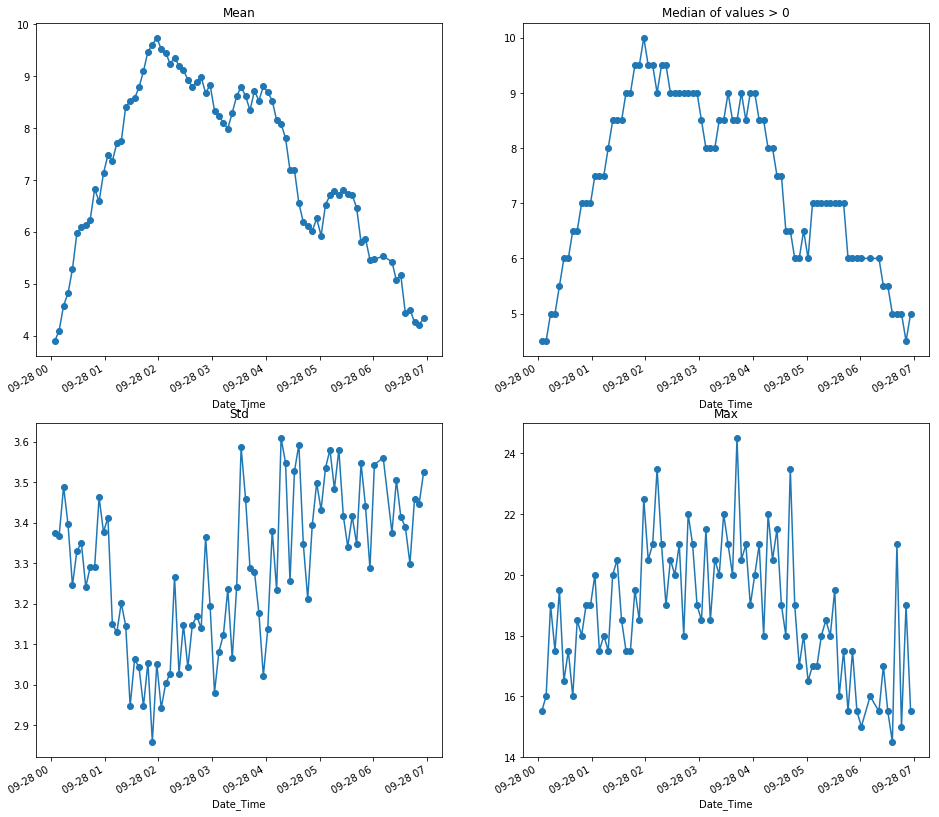

In [5]:
plot_ts(df)

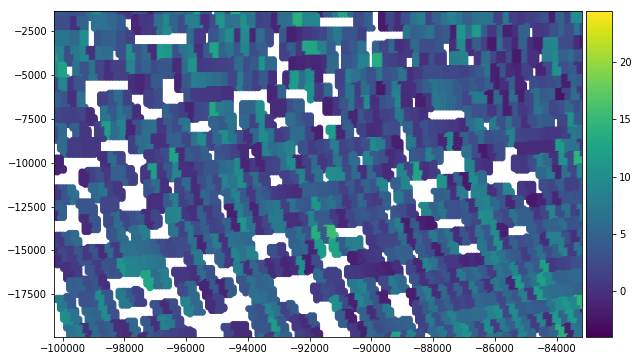

In [6]:
vid = plot_video(df)

In [7]:
vid.save("all_927.mp4")

/home/christian/.miniconda2/envs/gdalwtf/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


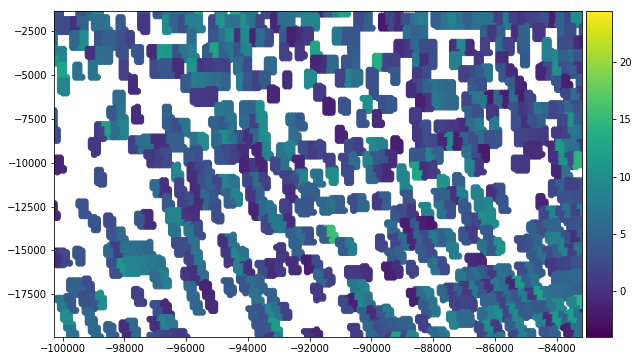

In [10]:
cut_df = cut_weather(cut_insects(df))
vid = plot_video(cut_df)
vid.save("cut_927.mp4")

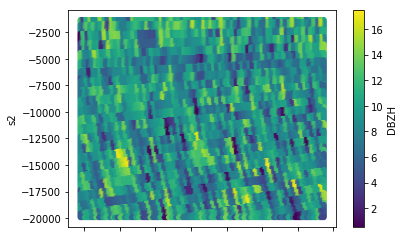

In [15]:
from pandas import Timestamp
most_vals = df[df.Date_Time == Timestamp('2017-09-28 01:43:26')]
most_vals.plot('s1', 's2', c='DBZH', kind='scatter', colormap='viridis')

In [48]:
sampled = most_vals.sample(1, random_state=43).iloc[0]
radius = 1000
sampled.s1, sampled.s2

(-94771.87832245321, -9527.60006191476)

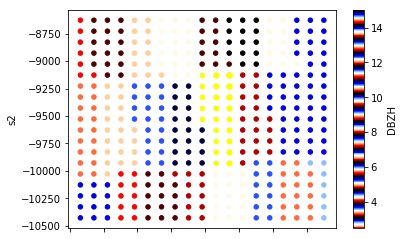

In [49]:
import numpy as np

def search(point):
    neighbor_indices = [point.name]
    neighbor_queue = [point.name]
    visited = set()
    while neighbor_queue != []:
        p = most_vals.loc[neighbor_queue.pop(0)]
        visited.add(p.name)
        dists = (most_vals.s1 - p.s1)**2 + (most_vals.s2 - p.s2) ** 2
        neighbors =  dists.sort_values().iloc[1:5].index
        diffs = most_vals.loc[neighbors].DBZH - sampled.DBZH
        for ix in diffs[diffs == 0].index:
            if ix in visited:
                continue
            neighbor_indices.append(ix)
            neighbor_queue.append(ix)
    return neighbor_indices
indices = search(sampled)
ax = most_vals[(most_vals.s1 > sampled.s1 - radius) &\
          (most_vals.s2 > sampled.s2 - radius) &\
          (most_vals.s1 < sampled.s1 + radius) &\
          (most_vals.s2 < sampled.s2 + radius)].plot('s1', 's2', kind='scatter', c='DBZH', colormap='flag')
most_vals.loc[indices].plot('s1', 's2', c='yellow', kind='scatter', ax=ax)

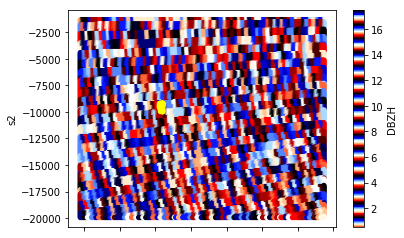

In [54]:
ax = most_vals.plot('s1', 's2', kind='scatter', c='DBZH', colormap='flag')
most_vals.loc[indices].plot('s1', 's2', c='yellow', kind='scatter', ax=ax)